In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd 
import numpy as np
import scipy
import os
exp_name = "lineartcga"
type_name = "pred"
save_name = exp_name + "_" + type_name

(9,) (9,) (9,) (9,)


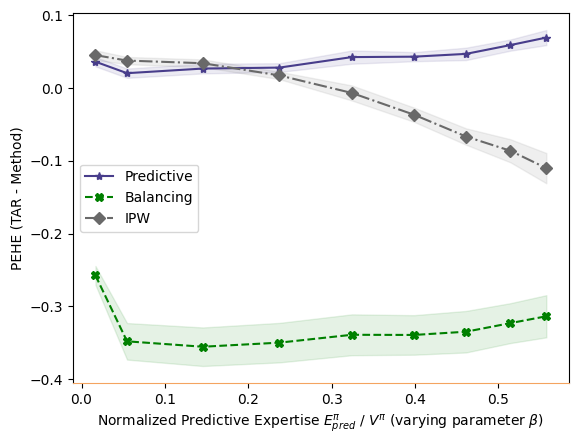

In [25]:
# for the b experiment, we take d = half
# Lists to store---in order---Ours, CFRNet, TARNet, IPW, ground truth expertise, ground truth action variability
b_ce = []
b_cfr = []
b_tar = []
b_ipw = []
b_exp = []
b_av = []
b_ce_exp = []
b_cfr_exp = []
b_tar_exp = []
b_ipw_exp = []

# Sorting
all_files = []
for file in os.listdir("."):
    if exp_name in file and type_name in file and "0.txt" in file and "10.txt" not in file and "entropy" not in file and "non" not in file:
        all_files.append(file)
# print(all_files)
all_files = sorted(all_files)
all_files.insert(0, type_name + exp_name + "_1000.10.txt")
# assert "10" in all_files[2]
# ten = all_files.pop(2)
# all_files.append(ten)
# all_files.reverse()
# print(all_files)

for file in all_files:
        # print(file)
        ce = []
        cfr = []
        tar = []
        ipw = []
        with open(file, "r") as f:
            lines = f.read()
            lines = lines.split("\n")
            lines = [i for i in lines if "seed" not in i and len(i) > 0][:10]
            # lines = [i for i in lines if len(i) > 0]
            # print(len(text))
            assert len(lines) == 10
            for text in lines:
                text = text.split("ce")[-1].split("cfr")
                # print(text)
                ce.append(float(text[0]))
                text = text[-1].split("tar")
                cfr.append(float(text[0]))
                text = text[-1].split("ipw")
                tar.append(float(text[0]))
                ipw.append(float(text[-1]))
        b_ce.append(ce)
        b_cfr.append(cfr)
        b_tar.append(tar)
        b_ipw.append(ipw)
        
        ce = []
        cfr = []
        tar = []
        ipw = []
        gt = []
        av = []
        with open("entropy" + file, "r") as f:
            lines = f.read()
            lines = lines.split("\n")
            lines = [i for i in lines if "seed" not in i and len(i) > 0]
            # lines = [i for i in lines if len(i) > 0]
            # print(len(text))
            assert len(lines) == 10
            for text in lines:
                text = text.split("ce")[-1].split("cfr")
                # print(text)
                ce.append(float(text[0]))
                text = text[-1].split("tar")
                cfr.append(float(text[0]))
                text = text[-1].split("ipw")
                tar.append(float(text[0]))
                text = text[-1].split("gt")
                ipw.append(float(text[0]))
                text = text[-1].split("av")
                gt.append(float(text[0]))
                av.append(float(text[-1]))
                
        b_ce_exp.append(ce)
        b_cfr_exp.append(cfr)
        b_tar_exp.append(tar)
        b_ipw_exp.append(ipw)
        b_exp.append(gt)
        b_av.append(av)
# print(len(b_ce), len(b_cfr), len(b_tar), len(b_ipw))
# print(np.array(b_ce).shape, np.array(b_cfr).shape, np.array(b_tar).shape, np.array(b_ipw).shape)

b_ce_std = scipy.stats.sem(np.array(b_tar) - np.array(b_ce), axis=1)
b_ce = np.mean(np.array(b_tar) - np.array(b_ce), axis=1)
b_cfr_std = scipy.stats.sem(np.array(b_tar) - np.array(b_cfr), axis=1)
b_cfr = np.mean(np.array(b_tar) - np.array(b_cfr), axis=1)
b_ipw_std = scipy.stats.sem(np.array(b_tar) - np.array(b_ipw), axis=1)
b_ipw = np.mean(np.array(b_tar) - np.array(b_ipw), axis=1)
b_tar_std = scipy.stats.sem(np.array(b_tar), axis=1)
b_tar = np.mean(np.array(b_tar), axis=1)

b_exp_std = scipy.stats.sem(np.array(b_exp), axis=1)
b_exp = np.mean(np.array(b_exp), axis=1)
b_av_std = scipy.stats.sem(np.array(b_av), axis=1)
b_av = np.mean(np.array(b_av), axis=1)

print(b_ce.shape, b_cfr.shape, b_tar.shape, b_ipw.shape)

xaxis = range(len(b_ce))
my_xticks = ['irrelevant', '', '', '', '', '', '', 'predictive']
ax = plt.axes()
ax.spines['bottom'].set_color("sandybrown")

plt.plot(b_exp / b_av, b_ce, label="Predictive", color="darkslateblue", linestyle="-", marker="*")
plt.plot(b_exp / b_av, b_cfr, label="Balancing", color="green", linestyle="--", marker="X")
plt.plot(b_exp / b_av, b_ipw, label="IPW", color="dimgray", linestyle="-.", marker="D")
plt.fill_between(b_exp / b_av, b_ce - b_ce_std, b_ce + b_ce_std, alpha=0.1, color="darkslateblue")
plt.fill_between(b_exp / b_av, b_cfr - b_cfr_std, b_cfr + b_cfr_std, alpha=0.1, color="green")
plt.fill_between(b_exp / b_av, b_ipw - b_ipw_std, b_ipw + b_ipw_std, alpha=0.1, color="dimgray")
# plt.plot(np.array(gtval)[indices] / np.array(avval)[indices], np.array(tarval)[indices], label="tar", color="yellow", linestyle="-.", marker="D")
# plt.fill_between(np.array(gtval)[indices] / np.array(avval)[indices], (np.array(tarval)-np.array(tarerr))[indices], (np.array(tarval)+np.array(tarerr))[indices], alpha=0.1, color="darkslateblue")
plt.legend()
plt.xlabel(r"Normalized Predictive Expertise $E^{\pi}_{pred}$ / $V^{\pi}$ (varying parameter $\beta$)")
plt.ylabel("PEHE (TAR - Method)")
# plt.savefig("propscale.pdf")
plt.show()

if not os.path.exists(save_name):
    os.makedirs(save_name)
    
with open(os.path.join(save_name, "beta-policyaware.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_ce[i]))
        f.write("\n")
with open(os.path.join(save_name, "beta-policyaware-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_ce[i] - b_ce_std[i]))
        f.write("\n")
with open(os.path.join(save_name, "beta-policyaware-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_ce[i] + b_ce_std[i]))
        f.write("\n")
with open(os.path.join(save_name, "beta-balancing.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_cfr[i]))
        f.write("\n")
with open(os.path.join(save_name, "beta-balancing-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_cfr[i] - b_cfr_std[i]))
        f.write("\n")
with open(os.path.join(save_name, "beta-balancing-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_cfr[i] + b_cfr_std[i]))
        f.write("\n")
with open(os.path.join(save_name, "beta-propensity.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_ipw[i]))
        f.write("\n")
with open(os.path.join(save_name, "beta-propensity-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_ipw[i] - b_ipw_std[i]))
        f.write("\n")
with open(os.path.join(save_name, "beta-propensity-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_ipw[i] + b_ipw_std[i]))
        f.write("\n")
with open(os.path.join(save_name, "beta-tar.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_tar[i]))
        f.write("\n")
with open(os.path.join(save_name, "beta-tar-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_tar[i] - b_tar_std[i]))
        f.write("\n")
with open(os.path.join(save_name, "beta-tar-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_tar[i] + b_tar_std[i]))
        f.write("\n")

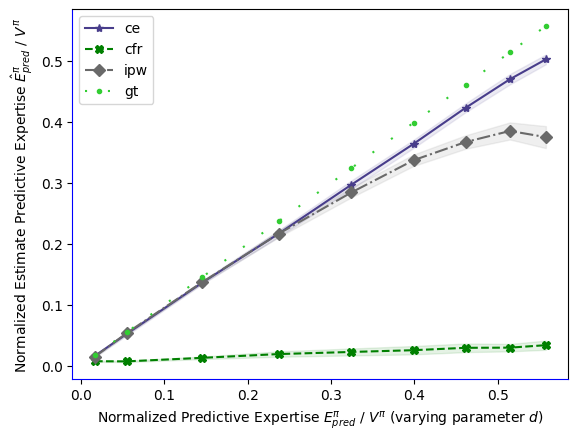

In [26]:
# print(np.array(b_ce_exp).shape, np.array(b_cfr_exp).shape, np.array(b_tar_exp).shape, np.array(b_ipw_exp).shape)
b_ce_exp_std = scipy.stats.sem(np.array(b_ce_exp), axis=1)
b_ce_exp = np.mean(np.array(b_ce_exp), axis=1)
b_cfr_exp_std = scipy.stats.sem(np.array(b_cfr_exp), axis=1)
b_cfr_exp = np.mean(np.array(b_cfr_exp), axis=1)
b_ipw_exp_std = scipy.stats.sem(np.array(b_ipw_exp), axis=1)
b_ipw_exp = np.mean(np.array(b_ipw_exp), axis=1)
b_tar_exp_std = scipy.stats.sem(np.array(b_tar_exp), axis=1)
b_tar_exp = np.mean(np.array(b_tar_exp), axis=1)

ax = plt.axes()
ax.spines['bottom'].set_color("blue")
ax.spines['left'].set_color("blue")


plt.plot(b_exp / b_av, b_ce_exp / b_av, label="ce", color="darkslateblue", linestyle="-", marker="*")
plt.plot(b_exp / b_av, b_cfr_exp / b_av, label="cfr", color="green", linestyle="--", marker="X")
plt.plot(b_exp / b_av, b_ipw_exp / b_av, label="ipw", color="dimgray", linestyle="-.", marker="D")
# plt.plot(gtval[indices][start:] / avval[indices][start:], tarval[indices][start:] / avval[indices][start:], label="tar", color="dimgray", linestyle="-.", marker="D")
plt.plot(b_exp / b_av, b_exp / b_av, label="gt", color="limegreen", linestyle=(0, (1, 10)), marker=".")
plt.fill_between(b_exp / b_av, (b_ce_exp - b_ce_exp_std) / b_av, (b_ce_exp + b_ce_exp_std) / b_av, alpha=0.1, color="darkslateblue")
plt.fill_between(b_exp / b_av, (b_cfr_exp - b_cfr_exp_std) / b_av, (b_cfr_exp + b_cfr_exp_std) / b_av, alpha=0.1, color="green")
plt.fill_between(b_exp / b_av, (b_ipw_exp - b_ipw_exp_std) / b_av, (b_ipw_exp + b_ipw_exp_std) / b_av, alpha=0.1, color="dimgray")
# plt.fill_between(gtval[indices][start:] / avval[indices][start:], (tarval[indices][start:]-tarerr[indices][start:]) / avval[indices][start:], (tarval[indices][start:]+tarerr[indices][start:]) / avval[indices][start:], alpha=0.1, color="dimgray")
# plt.fill_between(gtval[indices][start:] / avval[indices][start:], (gtval[indices][start:]-gterr[indices][start:]) / avval[indices][start:], (gtval[indices][start:]+gterr[indices][start:]) / avval[indices][start:], alpha=0.1, color="limegreen")
plt.legend()
plt.xlabel(r"Normalized Predictive Expertise $E^{\pi}_{pred}$ / $V^{\pi}$ (varying parameter $d$)")
plt.ylabel(r"Normalized Estimate Predictive Expertise $\hat E^{\pi}_{pred}$ / $V^{\pi}$")
plt.savefig("featureexpertise.pdf")
plt.show()

with open(os.path.join(save_name, "expbeta-policyaware.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_ce_exp[i] / b_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expbeta-policyaware-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_ce_exp[i] / b_av[i] - b_ce_exp_std[i] / b_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expbeta-policyaware-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_ce_exp[i] / b_av[i] + b_ce_exp_std[i] / b_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expbeta-balancing.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_cfr_exp[i] / b_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expbeta-balancing-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_cfr_exp[i] / b_av[i] - b_cfr_exp_std[i] / b_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expbeta-balancing-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_cfr_exp[i] / b_av[i] + b_cfr_exp_std[i] / b_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expbeta-propensity.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_ipw_exp[i] / b_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expbeta-propensity-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_ipw_exp[i] / b_av[i] - b_ipw_exp_std[i] / b_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expbeta-propensity-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_ipw_exp[i] / b_av[i] + b_ipw_exp_std[i] / b_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expbeta-tar.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_tar_exp[i] / b_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expbeta-tar-lower.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_tar_exp[i] / b_av[i] - b_tar_exp_std[i] / b_av[i]))
        f.write("\n")
with open(os.path.join(save_name, "expbeta-tar-upper.dat"), 'a') as f:
    for i in xaxis:
        f.write(str(b_exp[i] / b_av[i]) + " " + str(b_tar_exp[i] / b_av[i] + b_tar_exp_std[i] / b_av[i]))
        f.write("\n")